# CUSUM Trader API
### Instructions:

- Use `.trade()` method to simulate all models at once.
- Use `.runModel(modelName)` method to run a specific model. 
    - For example, `.runModel('Residual CUSUM No Fee', feature='residualFeature', method='montgomery', fee=0)`.

- modelName can be:
    - 'Return CUSUM No Fee', 'Return CUSUM No Fee 46', 'Return CUSUM', 'Return CUSUM 46', 'Residual CUSUM No Fee', 'Residual CUSUM No Fee 46', 'Residual CUSUM', 'Residual CUSUM 46', 'Return EWMA No Fee', 'Return EWMA', 'Residual EWMA No Fee', 'Residual EWMA', 'Benchmark' (46 means the Literature CUSUM model. Other CUSUM models are Montgomery.)
    - You need to select proper `feature`, `method`, `fee` values for each model.

- Model's results are stored in a dictionary attribute `results`. You can access specific model's result by indexing.
    - For example, `.results[model]['signal plot']` will show the price plot with buy and sell signals.
- Keys in `.results` includes: 

          'signals':          trading signal table for this model 
          'signal plot':      price plot with buy and sell signals
          'backtest ratios':  key metrics from backtest
          'backtest df':      raw result table after backtest
     For CUSUM models:
          'score':            k, h score table
          'score plot':       k, h score plots
          'k', 'h':           k, h values
          'CUSUM plot':       CUSUM plot which trading signals based on
     For EWMA models:
          'EWMA plot':        EWMA plot which trading signals based on"
          
- Backtest results:
    - `.summary()` shows the table of key metrics.
    - `.equityPlot` and `drawdownPlot` will be updated after `.summary()` each time.
          
### 1 Cryptos

In [1]:
from cusumtrader import CusumTrader

# coin lists: 'BTC', 'ETH', 'SOL', 'XRP', 'BNB', 'USDT', 'ADA', 'DOT', 'LUNA', 'DOGE'
b = CusumTrader('BTC') 
b.trade()

Test model: Return CUSUM No Fee ...
Test model: Return CUSUM No Fee 46 ...
Test model: Return CUSUM ...
Test model: Return CUSUM 46 ...
Test model: Residual CUSUM No Fee ...
Test model: Residual CUSUM No Fee 46 ...
Test model: Residual CUSUM ...
Test model: Residual CUSUM 46 ...
Test model: Return EWMA No Fee ...
Test model: Return EWMA ...
Test model: Residual EWMA No Fee ...
Test model: Residual EWMA ...


In [2]:
b.summary()

,Strategy,Start Time,End Time,Duration,Exposure Time,Waiting Time,Sharpe Ratio,Sortino Ratio
12,Benchmark,2021-09-01,2021-11-01,61 days,61 days 00:00:00,0 days 00:00:00,0.026543,0.043066
0,Return CUSUM No Fee,2021-09-01,2021-11-01,61 days,0 days 05:16:03.057324,60 days 18:43:56.942675,0.005934,0.009742
1,Return CUSUM No Fee 46,2021-09-01,2021-11-01,61 days,0 days 01:52:54.440894,60 days 22:07:05.559105,0.001247,0.001938
5,Residual CUSUM No Fee 46,2021-09-01,2021-11-01,61 days,0 days 01:40:35.820895,60 days 22:19:24.179104,0.000236,0.000354
8,Return EWMA No Fee,2021-09-01,2021-11-01,61 days,0 days 08:00:00,60 days 16:00:00,0.000000,0.000000
9,Return EWMA,2021-09-01,2021-11-01,61 days,0 days 08:00:00,60 days 16:00:00,0.000000,0.000000
4,Residual CUSUM No Fee,2021-09-01,2021-11-01,61 days,0 days 04:20:51.336898,60 days 19:39:08.663101,-0.003971,-0.006452
10,Residual EWMA No Fee,2021-09-01,2021-11-01,61 days,30 days 14:00:00,30 days 10:00:00,-0.038653,-0.041988
11,Residual EWMA,2021-09-01,2021-11-01,61 days,30 days 14:00:00,30 days 10:00:00,-0.038815,-0.042196
6,Residual CUSUM,2021-09-01,2021-11-01,61 days,0 days 09:04:19.793814,60 days 14:55:40.206185,-0.050799,-0.082782


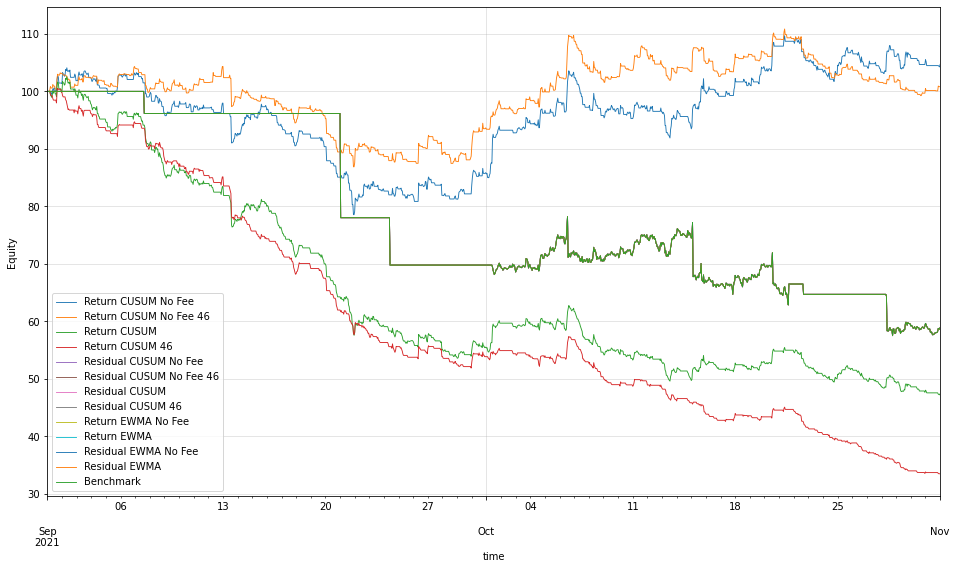

In [3]:
b.equityPlot

### Looking into details

In [5]:
b.results['Residual CUSUM']['signals']

,BTC,ETH,SOL,XRP,BNB,USDT,ADA,DOT,LUNA,DOGE,...,logPrice,return,residual,residualFeature,cPlus,equityWithoutFee,cMinus,z,ucl,lcl
time,,,,,,,,,,,,,,,,,,,,,
2021-09-01 00:00:00,46778.94,3400.36,107.09,1.163,457.60,1.000,2.736,30.54,30.74,0.2739,...,10.753188,0.000000,-5196.571106,-13.539138,0.000000,NaN,NaN,-4.049756,0.917122,-0.882878
2021-09-01 01:00:00,46864.76,3426.76,111.22,1.176,459.96,1.000,2.752,30.87,31.08,0.2766,...,10.755021,0.001833,81.655512,0.212745,0.000000,100.000000,NaN,-2.771006,1.115712,-1.081468
2021-09-01 02:00:00,46899.74,3422.93,110.04,1.173,460.70,1.001,2.762,30.14,30.97,0.2752,...,10.755767,0.000746,30.925159,0.080572,0.000000,100.000000,NaN,0.036157,0.917122,-0.882878
2021-09-01 03:00:00,47055.59,3444.91,111.26,1.183,463.26,1.001,2.762,30.10,31.33,0.2761,...,10.759085,0.003318,151.800088,0.395500,0.000000,100.000000,NaN,0.143960,1.115712,-1.081468
2021-09-01 04:00:00,47146.40,3460.66,111.99,1.192,465.36,1.000,2.773,30.35,31.00,0.2772,...,10.761013,0.001928,86.939860,0.226513,0.000000,100.000000,NaN,0.168726,1.200921,-1.166678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-31 20:00:00,60969.55,4268.43,198.43,1.102,520.68,1.001,1.959,42.58,42.82,0.2732,...,11.018130,0.003807,238.711233,0.621938,0.121938,55.190256,0.000000,0.241287,1.277374,-1.243130
2021-10-31 21:00:00,61483.09,4308.44,204.40,1.122,524.29,1.000,1.983,43.08,43.20,0.2770,...,11.026517,0.008388,520.849787,1.357021,0.978959,55.190256,0.000000,0.576008,1.277374,-1.243130
2021-10-31 22:00:00,61417.06,4296.65,202.20,1.112,525.50,1.001,1.971,42.98,43.19,0.2780,...,11.025443,-0.001075,-58.180689,-0.151584,0.000000,54.855329,-0.651584,0.357730,1.277374,-1.243130


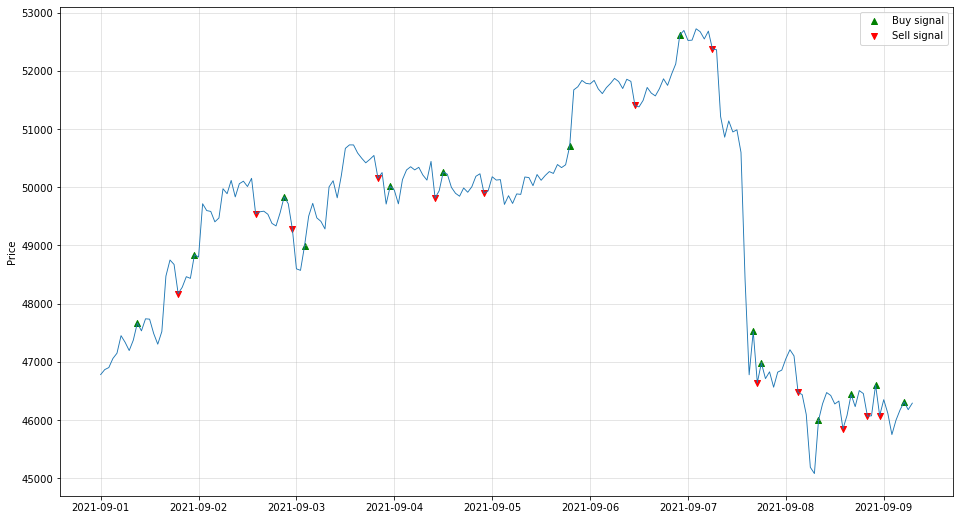

In [6]:
b.results['Residual CUSUM']['signal plot']

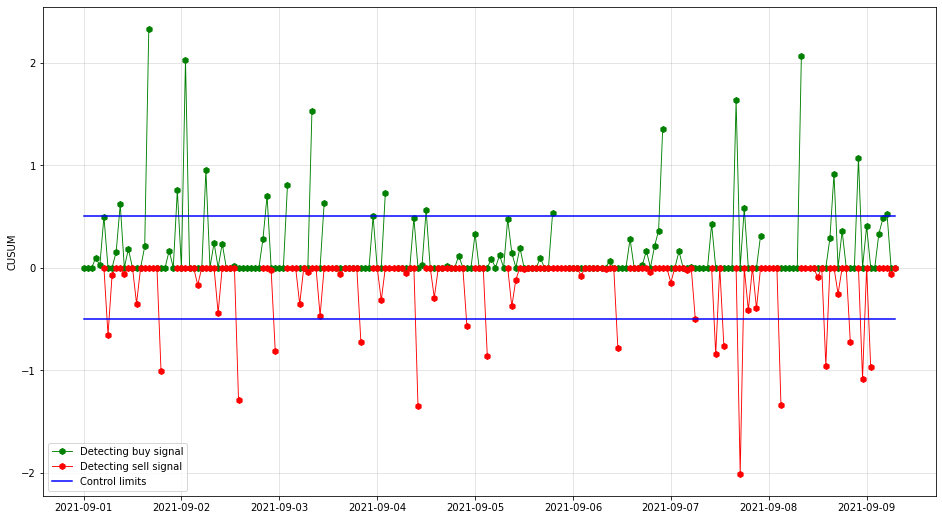

In [7]:
b.results['Residual CUSUM']['CUSUM plot']

In [9]:
b.results['Residual CUSUM']['score']

,k,h,finalEquity
11,0.30,0.50,51.563322
35,0.50,0.50,50.162316
34,0.50,0.45,46.814687
29,0.45,0.50,45.815051
32,0.50,0.35,44.567664
27,0.45,0.40,43.405209
17,0.35,0.50,43.271956
16,0.35,0.45,42.926127
31,0.50,0.30,42.147187
21,0.40,0.40,41.487089


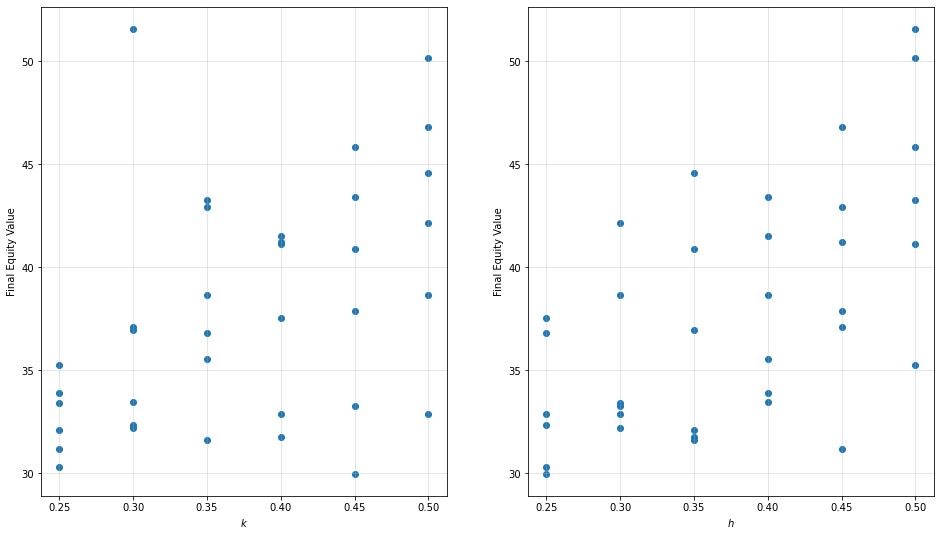

In [10]:
b.results['Residual CUSUM']['score plot']

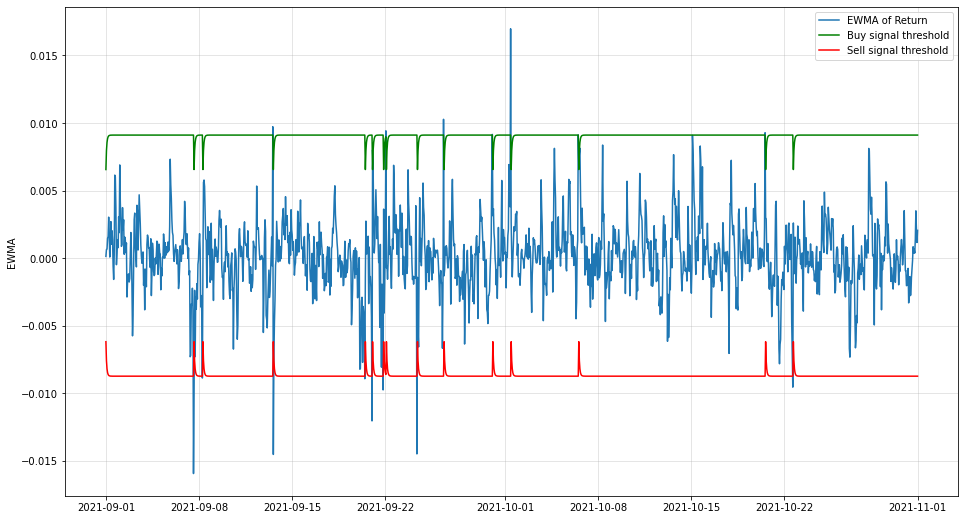

In [11]:
b.results['Return EWMA']['EWMA plot']

### 2 Risk-adjusted CUSUM on BioTech Industry

In [12]:
ra = CusumTrader(ra=True)

Test model: Risk Adjusted CUSUM No Fee ...
Test model: Risk Adjusted CUSUM ...


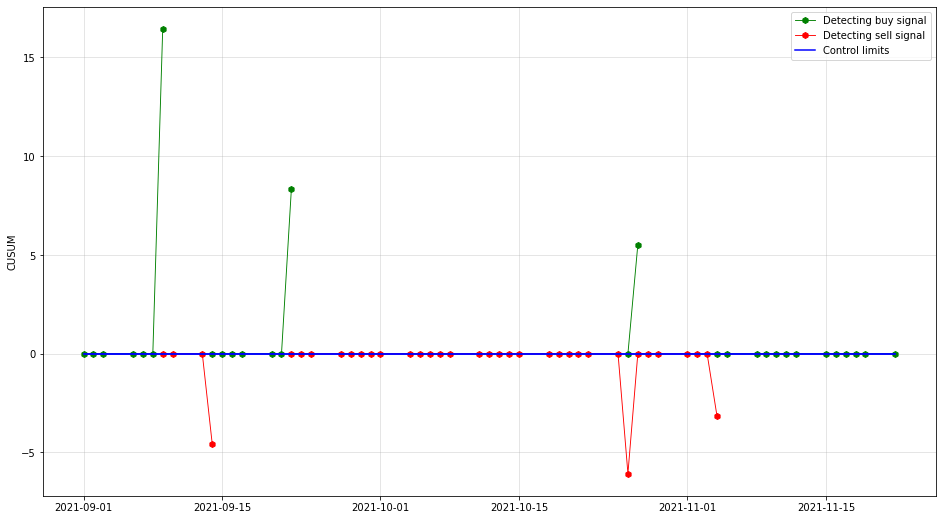

In [13]:
ra.results['Risk Adjusted CUSUM']['CUSUM plot']

In [14]:
ra.results['Risk Adjusted CUSUM']['score']

,k,h,finalEquity
0,0.0010,0.0010,97.439279
25,0.0016,0.0018,97.439279
27,0.0016,0.0022,97.439279
28,0.0018,0.0010,97.439279
29,0.0018,0.0012,97.439279
30,0.0018,0.0014,97.439279
31,0.0018,0.0016,97.439279
32,0.0018,0.0018,97.439279
33,0.0018,0.0020,97.439279
34,0.0018,0.0022,97.439279


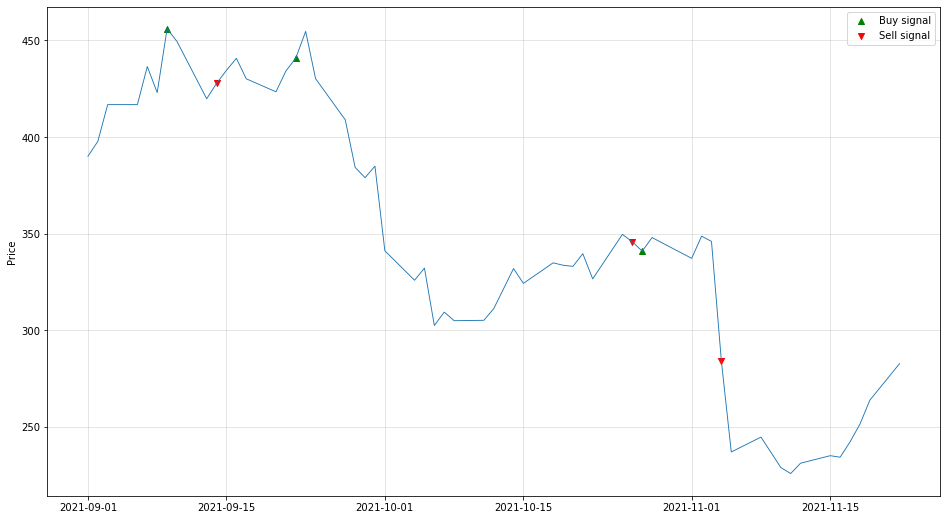

In [15]:
ra.results['Risk Adjusted CUSUM No Fee']['signal plot']